#### KNN Theory
#### 1.1 Type of algorithm

#### KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y)
#### and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y

.
#### 1.2 Distance measure

#### In the classification setting, the K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. The k-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples. Let xi be an input sample with p features (xi1,xi2,...,xip), n be the total number of input samples (i=1,2,...,n). The Euclidean distance between sample xi and xl is is defined as:
#### d(xi,xl)=(xi1−xl1)2+(xi2−xl2)2+...+(xip−xlp)2−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−√


#### Algorithm steps

#### STEP 1: Cgoose the number K of neighbors

#### STEP 2: Take the K nearest neighbors of the new data point, according to your distance metric

#### STEP 3: Among these K neighbors, count the number of data points to each category

#### STEP 4: Assign the new data point to the category where you counted the most neighbors


#### Iris dataset  

https://www.kaggle.com/datasets/uciml/iris


#### This data sets consists of 3 different types of irises Setosa, Versicolour, and Virginica.



#### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read the dataset

In [2]:
d =pd.read_csv('f.csv')
d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#### To check null values

In [3]:
d.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### to get the object counts of unique values

In [4]:
d['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Plot

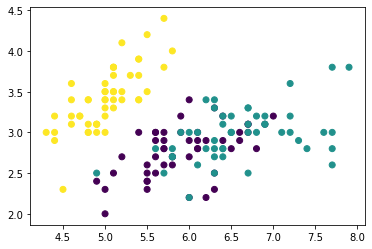

In [52]:
variant ={ 'Iris-versicolor':0,'Iris-virginica':1,'Iris-setosa':2}
color = [variant[item] for item in data['Species']]

scatter = plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],c=color)

plt.xlabel = ('Sepal_Length(Cm)')
plt.ylabel = ('Sepal_width(Cm)')


plt.show()

In [55]:
data= data.drop (columns = ['Species'], axis = 1)

#### to convert categorical variables into dummy

In [57]:
df=pd.get_dummies(d['Species'], dtype=int)

In [58]:
df

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


#### Concatunate data and df 

In [59]:
data1 = pd.concat([data, df], axis = 1)
data1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


#### Dividing into Input and Output values

In [76]:
x = data1.iloc[:,[0,1,2,3]].values
y = data1.iloc[:,[5,6,7]].values


In [77]:
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

In [78]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

#### Training and Testing Data

In [79]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test =  train_test_split (x,y,test_size=0.1)

In [80]:
x_train

array([[ 26. ,   5. ,   3. ,   1.6],
       [ 55. ,   6.5,   2.8,   4.6],
       [105. ,   6.5,   3. ,   5.8],
       [125. ,   6.7,   3.3,   5.7],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 29. ,   5.2,   3.4,   1.4],
       [ 65. ,   5.6,   2.9,   3.6],
       [ 97. ,   5.7,   2.9,   4.2],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 61. ,   5. ,   2. ,   3.5],
       [ 32. ,   5.4,   3.4,   1.5],
       [ 51. ,   7. ,   3.2,   4.7],
       [ 62. ,   5.9,   3. ,   4.2],
       [ 96. ,   5.7,   3. ,   4.2],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 53. ,   6.9,   3.1,   4.9],
       [ 28. ,   5.2,   3.5,   1.5],
       [ 47. ,   5.1,   3.8,   1.6],
       [ 42. ,   4.5,   2.3,   1.3],
       [ 81. ,   5.5,   2.4,   3.8],
       [ 52. ,   6.4,   3.2,   4.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 99. ,   5.1,   2.5,   3. ],
       [139. ,   6. ,   3. ,   4.8],
       [ 68. ,   5.8,   2.7,   4.1],
       [137. ,   6.3,   3.4,   5.6],
       [ 84. ,   6. ,   2.7,   5.1],
 

In [81]:
x_test

array([[ 13. ,   4.8,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [110. ,   7.2,   3.6,   6.1],
       [ 87. ,   6.7,   3.1,   4.7],
       [134. ,   6.3,   2.8,   5.1],
       [108. ,   7.3,   2.9,   6.3],
       [135. ,   6.1,   2.6,   5.6],
       [ 36. ,   5. ,   3.2,   1.2],
       [ 76. ,   6.6,   3. ,   4.4],
       [136. ,   7.7,   3. ,   6.1],
       [ 64. ,   6.1,   2.9,   4.7],
       [ 82. ,   5.5,   2.4,   3.7],
       [  8. ,   5. ,   3.4,   1.5],
       [ 86. ,   6. ,   3.4,   4.5],
       [ 49. ,   5.3,   3.7,   1.5]])

#### Importing KNeighborsClassifier from Scikit-learn.

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train,y_train)

KNeighborsClassifier()

#### Predicting the testing data

In [84]:
y_pred =neigh.predict(x_test)
y_pred

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

#### Predicting a new data

In [86]:
p=neigh.predict([[5,5.1,3,3.5]])
p

array([[1, 0, 0]])

#### import accuracy_score,confusion_matrix,classification_report

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### Classification report

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15
 samples avg       1.00      1.00      1.00        15



#### Accuracy

In [91]:
accuracy =accuracy_score(y_test,y_pred) 
accuracy

1.0

In [109]:
y_pred

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

#### Confusion matrix

In [110]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[5, 0, 0],
       [0, 5, 0],
       [0, 0, 5]])